## Compare ERA5 variables

Data January 2020 - downloaded resampled to daily resolution with 1-hourly (res for resampling) [Data Link](https://cds.climate.copernicus.eu/apps/user-apps/app-c3s-daily-era5-statistics?dataset=reanalysis-era5-single-levels&product_type=reanalysis&variable_e5sl=eastward_turbulent_surface_stress&pressure_level_e5sl=-&statistic=daily_mean&year_e5sl=2020&month=01&frequency=1-hourly&time_zone=UTC%2B00:00&grid_e5=0.25/0.25&area.lat:record:list:float=36&area.lat:record:list:float=45&area.lon:record:list:float=-20&area.lon:record:list:float=-5)

- TS: Turbulent surface stress $\frac{N}{m^2 s}$ 
- TSM: Mean turbulent surface stress $\frac{N}{m^2}$ 
- TSI: Instantaneous turbulent surface stress $\frac{N}{m^2}$ 

In [1]:
## import packages
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import os

In [126]:
## import data
os.chdir("/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/Data.nosync/Surface_stress/")

TS = xr.merge([xr.open_dataset(f) for f in glob.glob('Turbulent/*2020_01.nc')])
TSM = xr.merge([xr.open_dataset(f) for f in glob.glob('Turbulent_mean/*2020_01.nc')])
TSI = xr.merge([xr.open_dataset(f) for f in glob.glob('Turbulent_instantaneous/*2020_01.nc')])

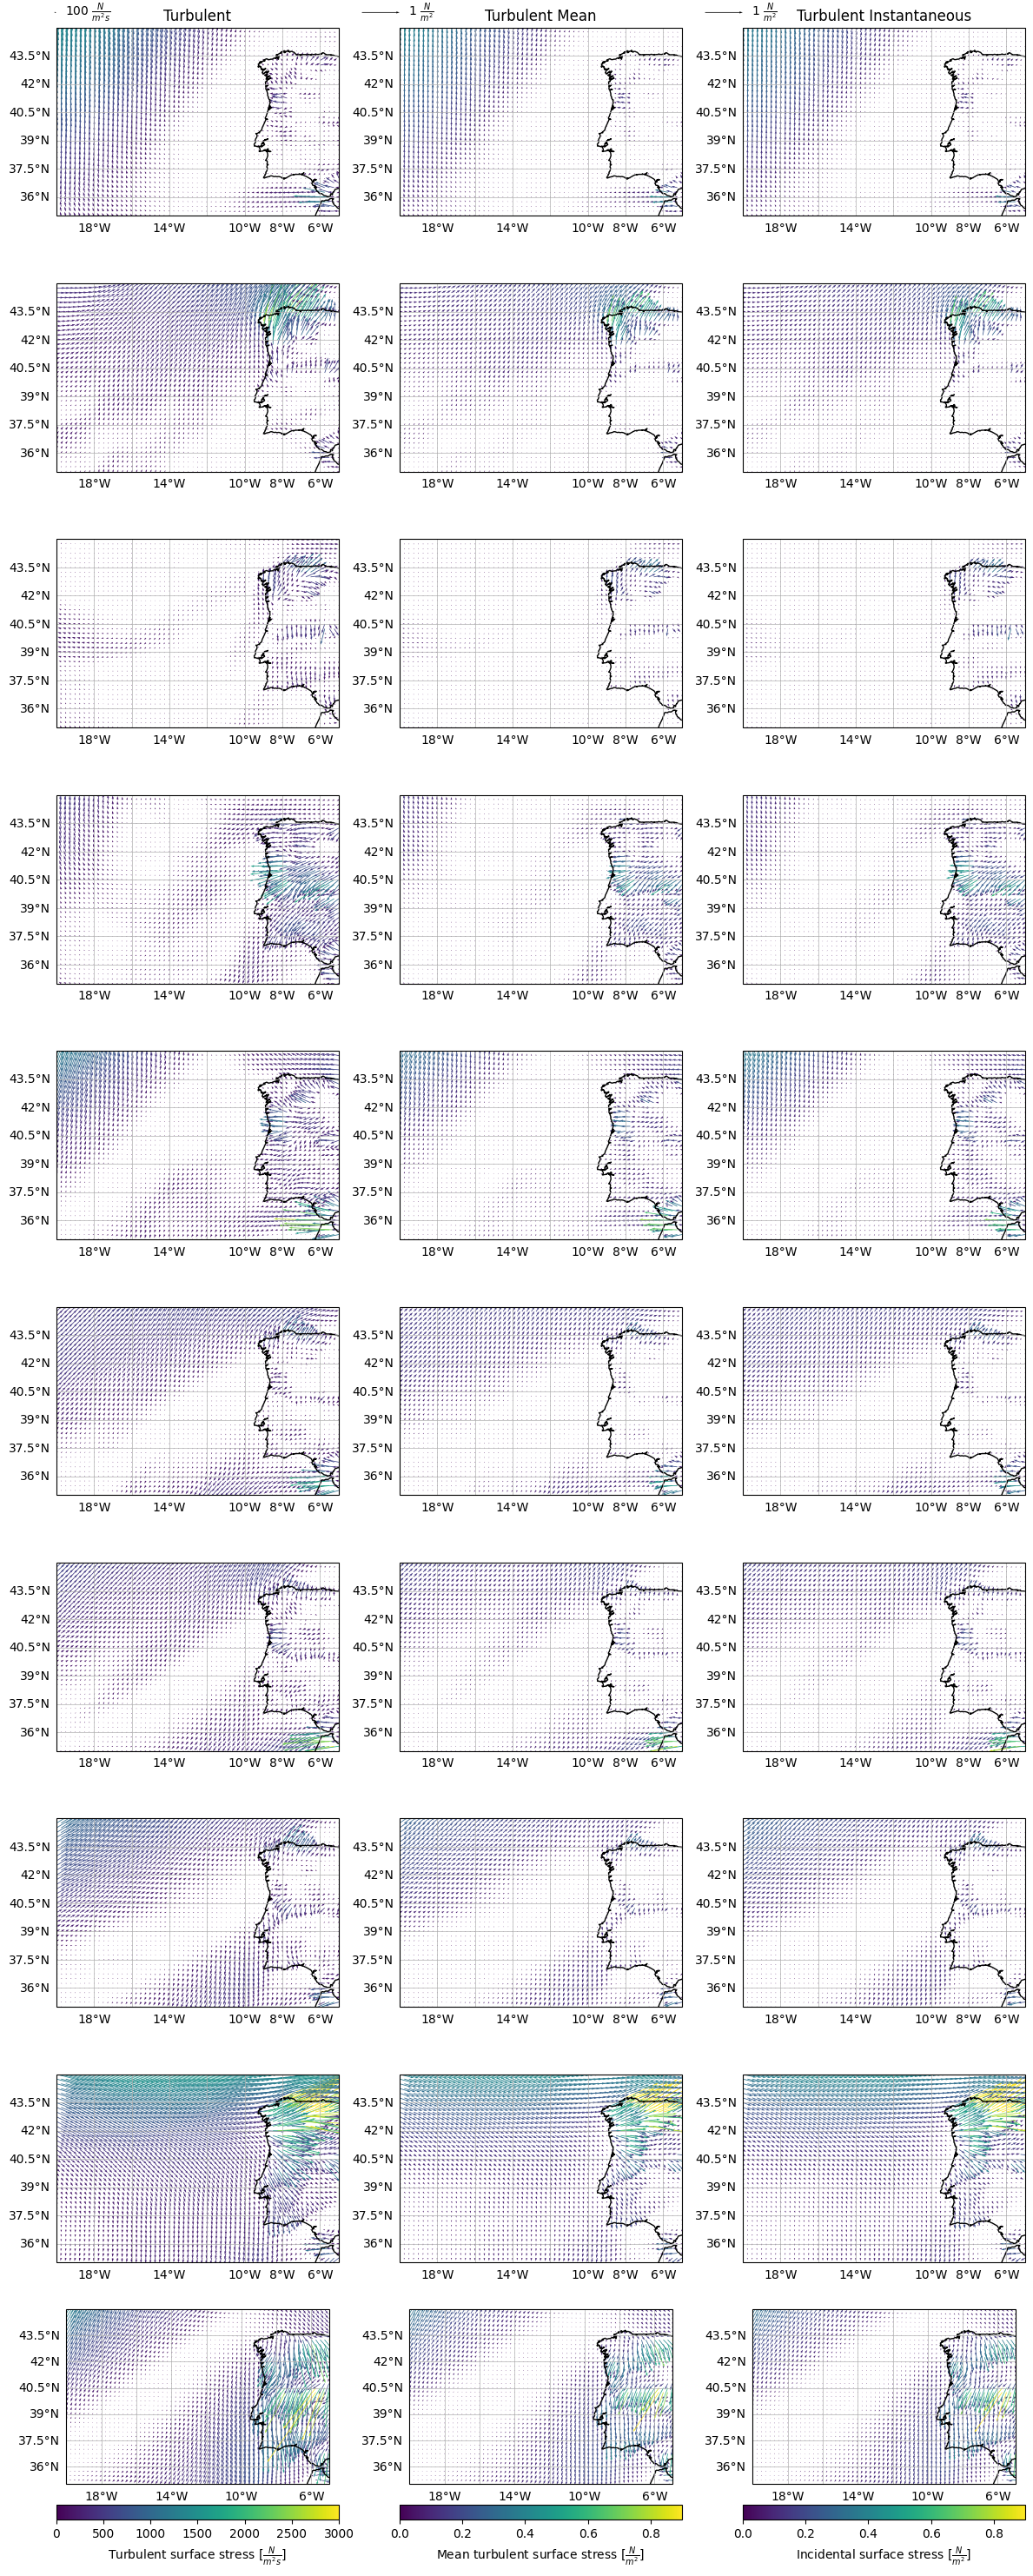

In [148]:
## plot

fig, ax = plt.subplots(10, 3, figsize = (12,30), subplot_kw={'projection': ccrs.PlateCarree()})

for r in np.arange(0, 10):
    for c in np.arange(0, 3):
        ax[r,c].set_extent([-20, -5, 45, 35])
        ax[r,c].coastlines()
        gls = ax[r,c].gridlines(draw_labels=True, linewidth = 0.5)
        gls.top_labels = False 
        gls.right_labels = False              

for r in np.arange(0, 10):
    ax[0,0].set_title('Turbulent')
    M1 = np.hypot(TS.ewss.isel(time = r), TS.nsss.isel(time = r))
    im1 = ax[r,0].quiver(TS.lon, TS.lat, TS.ewss.isel(time = r), TS.nsss.isel(time = r), 
                         M1, clim = [0, 3000],
                         angles='xy', scale_units='xy', scale=1000) 

    ax[0,1].set_title('Turbulent Mean')
    M2 = np.hypot(TSM.metss.isel(time = r), TSM.mntss.isel(time = r))
    im2 = ax[r,1].quiver(TSM.lon, TSM.lat, TSM.metss.isel(time = r), TSM.mntss.isel(time = r), 
                         M2, clim = [0, 0.9],
                         angles='xy', scale_units='xy', scale=0.5)

    ax[0,2].set_title('Turbulent Instantaneous')
    M3 = np.hypot(TSI.iews.isel(time = r), TSI.inss.isel(time = r))
    im3 = ax[r,2].quiver(TSI.lon, TSI.lat, TSI.iews.isel(time = r), TSI.inss.isel(time = r), 
                         M3, clim = [0, 0.9], 
                         angles='xy', scale_units='xy', scale=0.5)

    if r == 0:
        qk1 = ax[0,0].quiverkey(im1, 0, 1.08, 100, r'100 $\frac{N}{m^2 s}$', labelpos='E')
        qk2 = ax[0,0].quiverkey(im2, 0, 1.08, 1, r'1 $\frac{N}{m^2}$', labelpos='E')
        qk3 = ax[0,0].quiverkey(im3, 0, 1.08, 1, r'1 $\frac{N}{m^2}$', labelpos='E')

plt.colorbar(im1, ax = ax[9,0], label = r'Turbulent surface stress [$\frac{N}{m^2 s}$]', pad = 0.09, orientation = 'horizontal');
plt.colorbar(im2, ax = ax[9,1], label = r'Mean turbulent surface stress [$\frac{N}{m^2}$]', pad = 0.09, orientation = 'horizontal');
plt.colorbar(im3, ax = ax[9,2], label = r'Incidental surface stress [$\frac{N}{m^2}$]', pad = 0.09, orientation = 'horizontal');

fig.tight_layout()
plt.show()
fig.savefig('../../Iberian_Coast_Upwelling/Figures/ERA5_sufrace_stress_vars.png', dpi = 300)

In [128]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'
    Add a colorbar to a plot.
    
    Parameters
    ----------
    mappable
        The `matplotlib.cm.ScalarMappable` (i.e., `.AxesImage`,
        `.ContourSet`, etc.) described by this colorbar.  This argument is
        mandatory for the `.Figure.colorbar` method but optional for the
        `.pyplot.colorbar` function, which sets the default to the current
        image.
    
        Note that one can create a `.ScalarMappable` "on-the-fly" to
        generate colorbars not attached to a previously drawn artist, e.g.
        ::
    
            fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    
    cax : `~matplotlib.axes.Axes`, optional
        Axes into which the colorbar will be drawn.  If `None`, then a new
        A

In [87]:
print('Mean [N m^-2]')
print(f'min eastward: {"{:.2f}".format(np.min(TSM.metss.values))} max eastward: {"{:.2f}".format(np.max(TSM.metss.values))}')
print(f'min northward: {"{:.2f}".format(np.min(TSM.mntss.values))} max northward: {"{:.2f}".format(np.max(TSM.mntss.values))} \n')

print('Instantaneous [N m^-2]')
print(f'min eastward: {"{:.2f}".format(np.min(TSI.iews.values))} max eastward: {"{:.2f}".format(np.max(TSI.iews.values))}')
print(f'min northward: {"{:.2f}".format(np.min(TSI.inss.values))} max northward: {"{:.2f}".format(np.max(TSI.inss.values))} \n')

print('Turbulent [N m^-2 s]')
print(f'min eastward: {"{:.2f}".format(np.min(TS.ewss.values))} max eastward: {"{:.2f}".format(np.max(TS.ewss.values))}')
print(f'min northward: {"{:.2f}".format(np.min(TS.nsss.values))} max northward: {"{:.2f}".format(np.max(TS.nsss.values))}')


Mean [N m^-2]
min eastward: -3.07 max eastward: 2.00
min northward: -3.91 max northward: 3.72 

Instantaneous [N m^-2]
min eastward: -2.97 max eastward: 1.93
min northward: -3.89 max northward: 3.66 

Turbulent [N m^-2 s]
min eastward: -10883.15 max eastward: 7260.73
min northward: -14609.36 max northward: 13224.49


In [147]:
np.max(M1)

<xarray.DataArray 'ewss' ()> Size: 4B
array(4859.068, dtype=float32)
Coordinates:
    time         datetime64[ns] 8B 2020-01-10
    realization  int64 8B 0

In [ ]:
np.